In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Importar os dados e vizualizar

In [2]:
data = pd.read_csv('data/cleaned_data.csv')

data.head()

,price,sqft_living,grade,yr_built,zipcode
0,0.0,1180,7,1955,98178
1,2.0,2570,7,1951,98125
2,0.0,770,6,1933,98028
3,2.0,1960,7,1965,98136
4,2.0,1680,8,1987,98074


Separar os dados da resposta esperada pelos dados.

In [3]:
from sklearn.model_selection import train_test_split

targets = data['price']

attributes = data.drop(['price'], axis=1)

In [4]:
#Só dar uma olhada nos atributos selecionados:
attributes.describe()

,sqft_living,grade,yr_built,zipcode
count,21613.000000,21613.000000,21613.000000,21613.000000
mean,2079.899736,7.656873,1971.005136,98077.939805
std,918.440897,1.175459,29.373411,53.505026
min,290.000000,1.000000,1900.000000,98001.000000
25%,1427.000000,7.000000,1951.000000,98033.000000
50%,1910.000000,7.000000,1975.000000,98065.000000
75%,2550.000000,8.000000,1997.000000,98118.000000
max,13540.000000,13.000000,2015.000000,98199.000000


Tentar encontrar a árvore de decisão com a profundidade ideal (parece que é 9). Para esse caso é considerado o test_size arbitrário de 25%, mas isso é mudado nas próximas células

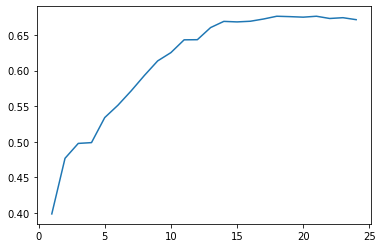

In [5]:
x_train, x_test, y_train, y_test = train_test_split(attributes, targets, test_size=0.25)

accuracy = []

depth = np.arange(1,25)

for d in depth:
    decision_tree = tree.DecisionTreeClassifier(max_depth = d)
    decision_tree.fit(x_train, y_train)
    
    y_pred = decision_tree.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(depth, accuracy)

Agora mudando a profundidade e o número de dados usados para teste

In [6]:
size = np.arange(1,100)/100

depth = np.arange(1,25)

accuracy = []

for s in size:
    
    x_train, x_test, y_train, y_test = train_test_split(attributes, targets, test_size = s)

    depth_line = []
    
    
    for d in depth:
        decision_tree = tree.DecisionTreeClassifier(max_depth = d)
        decision_tree.fit(x_train, y_train)

        y_pred = decision_tree.predict(x_test)

        depth_line.append(accuracy_score(y_test, y_pred))
        #depth_line.append(d+s)

    accuracy.append(depth_line)

#plt.plot(depth, accuracy)

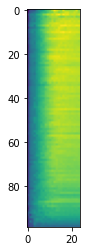

In [7]:
imgplot = plt.imshow(accuracy)

In [8]:
print(np.max(accuracy))

df = pd.DataFrame.from_records(accuracy)

#Só não estava conseguindo achar o índice do máximo

0.6933744221879815
